## Retrieving AGNs from images only using pretrained features
#### Lars Doorenbos, Stefano Cavuoti, Olena Torbaniuk, Giuseppe Longo, Maurizio Paolillo, Massimo Brescia, Raphael Sznitman, Pablo Márquez-Neila


##### Introduction

We present a method that, given the image of an AGN host galaxy as input, outputs a list of semantically similar objects, which our experiments show are likely to be an AGN host too. This is done by a similarity search in a feature space, obtained by running all images through a neural network pretrained on ImageNet. The method is extremely fast, as it requires no finetuning of the network. Moreover, it makes no assumptions about the input or the dataset it is used on, making it generally applicable. It should make for an excellent tool for the initial data processing of large surveys.

##### Data

We solely make use of optical images, as this is by far the easiest modality to come by, in line with the main goal of our method: to be an exploratory tool to make an selection of interesting objects to investigate further.

##### Method

We represent each image as a 1280-dimensional feature vector, by running them through a neural network pretrained on ImageNet, followed by channelwise average pooling of the feature maps in the penultimate layer. Here, each dimension focuses on some higher-level concept, e.g. a particular shape. We hypothesize that images which share a lot of the same image features, i.e. that are close together in this space, have the same astronomical properties. 

Then, to retrieve AGNs, we select a number of known AGNs, and look for the closest objects in the dataset. This is done by a nearest neighbour search in the deep feature space. To the best of our knowledge, this is the first attempt at using deep pretrained features to retrieve astronomical objects of interest.

##### Result

For evaluation, we use a subset of the SDSS based Brinchmann catalogue (https://www.sdss.org/dr12/spectro/galaxy_mpajhu/), which is richer in information, allowing us to identify low luminosity AGNs in well resolved galaxies. We define an AGN as being marked as either "AGN" or "low S/N AGN" in the BPT diagram classification from the Brinchmann catalogue. At this stage we do not use the LSSTC AGN Data here, as found objects could be AGN, but not be labelled as such, and there would be no way of knowing it.

We will using the following 2 objects as reference objects in a running example (http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?ra=51.3556883190224&dec=-6.14385552089765 and http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?ra=234.088787717649&dec=22.4871197421943):

<table><tr><td><img src='ref1.jpeg'></td><td><img src='ref2.jpeg'></td></tr></table>

After obtaining their features, we find the nearest neighbours among the first 100k images of the cleaned Brinchmann catalogue. We display the 25 closest below:

<img src="25q1.png">
<img src="25q2.png">

As mentioned, based on a combination of BPT diagram and x-ray diagnostic (see Torbaniuk et al. 2021), we know for these objects whether they are AGN or not. Hence, we can visualize the number of AGNs as a function of the distance to our reference object (in the feature space, not in terms of astronomical distance). 

The graph below shows this for both objects. The data contains around 11% AGN, hence that is the fraction we would expect when randomly selecting images from the dataset.

For the first object, say we set the threshold to be 4.6. We would select 232 objects, of which 42% are AGN.

For the second object, say we set the threshold to be 3.25. We would select 70 objects, of which 54% are AGN.

Using the above thresholds, we can move to another part of the dataset to measure its performance there.

<table><tr><td><img src='agndist1.png'></td><td><img src='agndist2.png'></td></tr></table>

We move to the second 100k images of the cleaned Brinchmann catalogue and perform the same experiment, using our chosen thresholds, where we find the results to be very similar.

For the first object, we would select 345 objects, of which 38% are AGN.

For the second object, we would select 81 objects, of which 54% are AGN.

<img src="25q1p2.png">
<img src="agn2dist1.png">
<img src="25q2p2.png">
<img src="agn2dist2.png">

Note that when incorporating all objects, we see how the fraction correctly converges to the fraction of AGN in the whole dataset.

<img src="agndistfull1.png">

We now turn to the LSSTC AGN Data. Using the same images as the reference object, we again show the 25 nearest neighbours, and find how many objects fall within our tresholds.

For object 1, there are 47 objects in this range, of which we would expect around 20 AGN (+-40%). This result has to be verified based on the unknown (to us) label classes.
<img src="lsstnns1.png">
Unfortunately for object 2, there are no objects in this range, though we nonetheless believe these 25 nearest neighbours to be promising. 
<img src="lsstnns2.png">

Note that the LSSTC AGN Data also contains a large number of stars, so the success rate might be somewhat lower, but so is the percentage of AGNs in the dataset. Results for more reference objects on the challenge data are given at the bottom of this notebook.

We tried using the small sample of labelled XMM data, to verify our method on the challenge data, but all labelled AGNs are optically faint. For example, when using one of them as the reference object, we get 22 among the 25 closest objects as AGN, far better than the 42% present in the sample. However, we reckon this is due to more AGN having a mostly black frame, rather than a succesful application of the method. For objects this faint, all information is practically stored in the central pixel, hence using a method like ours makes little sense.

<img src="agnlsst.png">

To evaluate whether our method performs better than just color selection, we try to quantify how much the morphological properties contribute to the final results, in addition to the photometry. For this purpose, we use only the i band (as opposed to gri), which should remove the dependence on color.

In eight out of ten cases we find that removing the color decreases performance by up to 10 percentage points, such as for our first reference object, where +-30% of close objects are now AGN:

<img src="1band1.png">

In one case, however, the performance almost drops to that of only slightly above random guessing, such as for reference object two, indicating the color (or maybe the combination of morphology and color) is fully responsible for retrieving AGN: 

<img src="1band2.png">

### Experiments on challenge data

Finally, we perform two experiments entirely on the challenge data.

#### Quasars

Randomly picking samples would result in 16.2% quasars. We test whether we can increase this by using four QSOs from the challenge data as reference objects. 

##### Succesful cases:
For the first our method also found many stars, which we reckon is a result of confusing bright blue stars in our Galaxy with quasars. Nonetheless, 40.4% out of the 1000 nearest objects are labelled as QSO.

For the fainter second object, 53.6% out of the 1000 nearest objects are labelled as QSO.

<table><tr><td><img src='qso3.png'></td><td><img src='qsofrac3.png'></td></tr></table>
<table><tr><td><img src='qso4.png'></td><td><img src='qsofrac4.png'></td></tr></table>

##### Unsuccesful cases:
For the first object, we think the method has a lower performance since the method is looking mostly to a configuration of multiple objects in the thumbnail, rather than pointing to the central object. We confirm this by showing the 25 nearest neighbours in the image below.

As for the second object, it looks like a distant galaxy rather than a ‘typical’ point-like blue quasar. We think our method found visually similar objects (galaxies), rather than quasars.

<table><tr><td><img src='qso1.png'></td><td><img src='qsofrac1.png'></td></tr></table>
<table><tr><td><img src='qso2.png'></td><td><img src='qsofrac2.png'></td></tr></table>


<img src='qsonns.png'>

#### Agn

The fraction of AGN in the whole sample is only 1.13%. We test whether we can increase this by using five AGN, with z < 0.2 (only 296 objects (+-0.07%) satisfy this), from the challenge data as reference objects. Among the 1000 closest objects, these find 2.5%, 1.6%, 2.9%, 3.8%, 2.3% AGN respectively.

<table><tr><td><img src='agn1.png'></td><td><img src='agnfrac1.png'></td></tr></table>
<table><tr><td><img src='agn2.png'></td><td><img src='agnfrac2.png'></td></tr></table>
<table><tr><td><img src='agn3.png'></td><td><img src='agnfrac3.png'></td></tr></table>
<table><tr><td><img src='agn4.png'></td><td><img src='agnfrac4.png'></td></tr></table>
<table><tr><td><img src='agn5.png'></td><td><img src='agnfrac5.png'></td></tr></table>

In this challenge we refer always to the purity of the output since the completeness would be depending, in the first place, on the completeness of the set of images selected for the investigation.
Our main point is that once LSST images will become available this method could be applied to any list of AGNs to detect objects which are similar with a good purity in terms of being AGNs.

All features we use come from the thumbnail image alone, and they should be general image patterns, not hand-selected for our use case. We measure to which degree 1280 of the patterns like the ones seen in the "High-level feature" part of the image below are present in an image. However, these patterns come from the model itself, and were derived from natural images, rather than astronomical ones. Hence, they do not necessarily have a logical interpretation for our use case. 

In short, the features used are general, non-astronomical, high-level patterns, that were not hand-crafted. Explaining these features is a whole field in itself, which we leave for future work.

<img src="cnn.png">
(Image taken from https://medium.com/analytics-vidhya/the-world-through-the-eyes-of-cnn-5a52c034dbeb)

Note that our method resizes images to 224x224, despite the current thumbnails being 64x64. Hence, moving to better quality/higher resolution images is a natural path for future improvement. Furthermore, explainable AI might provide new insights into which features are relevant for AGN detection. Finally, rather than measuring the distance to a single query, we could combine distances to multiple queries, in order to get more robust results.

##### Code

In [2]:
# !pip install efficientnet_pytorch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import efficientnet_pytorch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision
import torch
# import transparentx
from PIL import Image
pd.set_option('display.max_columns', 999)

data_dir = "/home/idies/workspace/Temporary/ywx649999311/LSST_AGN/Class_Training/DC/"

### 1. Data processing
Read data details

In [3]:
object_df_xmm = pd.read_parquet(os.path.join(data_dir, 'xmmlssObjectTable.parquet'))
object_df = pd.read_parquet(os.path.join(data_dir, 'ObjectTable.parquet'))

In [4]:
ids = object_df.index.values
xmm_ids = object_df_xmm.index.values

In [5]:
agns = object_df[object_df['class'] == 'Agn']
agns = agns[agns['z'] < 0.2]
agn_ids = agns.index.values

Remove missing cutouts

In [5]:
no_cutout_ids = pd.read_parquet(os.path.join(data_dir, 'cutouts/no_cutout_objectIds.parquet'))['objectId'].to_numpy()
indices = np.in1d(ids, no_cutout_ids).nonzero()[0]

ids = np.delete(ids, indices)

Load data

In [11]:
def npy_loader(path):
    sample = Image.fromarray(np.load(path))
    return sample

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

## => WY: change to local path <=
sym_linked = '/home/idies/workspace/Storage/ywx649999311/persistent/AGN_DataChallenge/subs/Lars/blinded_test/imgs/'
data = torchvision.datasets.DatasetFolder(sym_linked, npy_loader, ('.npy',), transform)

Run through pretrained neural network to obtain the feature vector for each image. Best ran with a GPU.

In [14]:
@torch.no_grad()
def get_latent_vectors(model, train_loader, device):
    model.eval()
    
    latent_vectors = []
    for cnt, x in enumerate(train_loader):
        x = x[0].to(device) 
        
        latent_vectors.append(network.extract_features(x).mean(dim=(2,3)))

    latent_vectors = torch.cat(latent_vectors).cpu().numpy()

    return latent_vectors    

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

network = efficientnet_pytorch.EfficientNet.from_pretrained('efficientnet-b0')

network.to(device)
network.eval()

trainLoader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=False, num_workers=4)

trainFeatures = get_latent_vectors(network, trainLoader, device)

## => WY: change to local path <=
np.save('/home/idies/workspace/Storage/ywx649999311/persistent/AGN_DataChallenge/subs/Lars/blinded_test/features', trainFeatures)

Loaded pretrained weights for efficientnet-b0


### 2. Similarity search

Fit NearestNeighbors on dataset for fast searches

In [15]:
xmm_inds = np.flatnonzero(np.isin(ids, xmm_ids))

In [17]:
features = np.load('blinded_test/features.npy')

In [18]:
xmm_features = features[xmm_inds]

In [19]:
object_df.loc[ids[xmm_inds]]['class'].value_counts()

Agn     4208
Gal     3923
Star     417
Name: class, dtype: int64

In [20]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=1000)
neigh.fit(features)

NearestNeighbors(n_neighbors=1000)

Our selected AGN queries

In [21]:
ra = [51.3556883190224, 251.529169948411,234.088787717649,203.951030415616,130.009856311043,167.845710068448,194.476510950904,118.082517169528,166.296180510448,118.192764951135]
dec = [-6.14385552089765, 42.4604060090059,22.4871197421943,2.99892172758812,29.8173982201398,2.39593469953884,27.4906327694844,17.7028729150508,38.3581518633047,25.0905594843618]

In [22]:
import imageio

def get_query(idx, method='brinch'):
    
    if method == 'brinch':
        url = 'http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra=' + str(ra[idx]) + '&dec=' + str(dec[idx]) + '&scale=0.4&height=64&width=64'
        im = imageio.imread(url)
    elif method == 'Agn':
        agns = ['1266373', '0860383', '0908413', '0963459', '0932728']
        im = np.load(os.path.join(data_dir, f'cutouts/' + agns[idx] + '.npy'))
    elif method == 'Qso':        
        qsos = ['1457905', '1402372', '1388973', '1403918']
        im = np.load(os.path.join(data_dir, f'cutouts/' + qsos[idx] + '.npy'))

    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    print("Query:")
    %matplotlib inline
    plt.imshow(Image.fromarray(im))
    plt.axis('off')
    plt.show()

    im = transform(Image.fromarray(im))

    network = efficientnet_pytorch.EfficientNet.from_pretrained('efficientnet-b0')
    network.eval()

    with torch.no_grad():
        queryF = network.extract_features(im[None]).mean(dim=(2,3)).cpu().numpy()

    return queryF

In [23]:
def get_nns(query):
    res = neigh.kneighbors(query)
    similar = res[1][0]
    dists = res[0][0]
    
    return similar, dists

In [24]:
def plot(similar):
    gridSize = 5
    print("Nearest neighbours:")
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [20, 10]

    f, axarr = plt.subplots(gridSize, gridSize) 

    for layer in range(gridSize):
        for img in range(gridSize):
            objectId = ids[similar[layer*gridSize+img]]
            rgbArray = np.load(os.path.join(data_dir, f'cutouts/{objectId}.npy'))

            axarr[img, layer].imshow(rgbArray)
            axarr[img, layer].axis('off')
    plt.show()

In [25]:
def class_labels(similar):
    labels = []
    for i in range(len(similar)):
        labels.append(str(object_df.loc[ids[similar[i]]]['class']))
    labels = np.array(labels)
    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return labels

In [26]:
def num_below_threshold(dists, threshold):
    return (dists < threshold).sum()

In [27]:
def plot_qsos(labels, dists, method, idx):
    plt.rcParams['figure.figsize'] = [20, 10]

    labels = (labels == method).astype(int)
    labels = np.cumsum(labels)
    
    labels = [labels[i] / (i + 1) for i in range(len(labels))]
    
    plt.figure()
    plt.plot(dists[1:], labels[1:])
    plt.xlabel('Distance to query')
    plt.ylabel('Percentage QSOs')
    if method == 'Agn':
        plt.ylim((0, 0.5))
    if method == 'Qso':
        plt.ylim((0, 1))
    plt.grid()
    plt.show()
    plt.close()

Function that finds the nearest neighbours for a query. Returns the distances and ids of the nearest neighbours. 

In [28]:
def run_image(idx, method='brinch', numIds = 20):
    query = get_query(idx, method)
    similar, dists = get_nns(query)
    if dists[0] < 0.001:
        similar = similar[1:]
        dists = dists[1:]
    plot(similar)
    labels = class_labels(similar)
    if method != 'brinch':
        plot_qsos(labels, dists, method, idx)    
    return dists, ids[similar[:numIds]]

In the following examples method has been applied to the challenge dataset,
for the first 10 experiments we used objects selected from the Brinchmann catalogue while the last two examples are extracted directly from the challenge dataset.
The list just below the 5x5 mosaic represents the classification (according to the challenge labels) of the closest 1000 objects. 

Query:


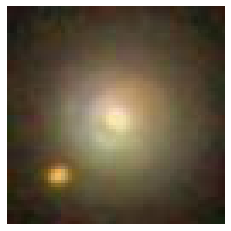

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


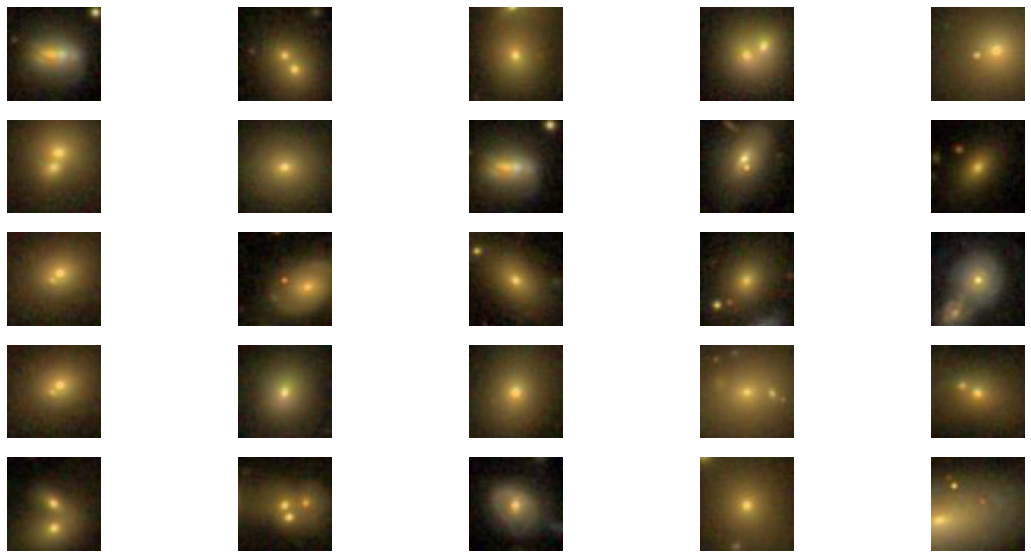

{'Agn': 28, 'Gal': 851, 'None': 65, 'Qso': 4, 'Star': 52}
['0457600' '0913001' '0697127' '0444202' '0827925' '0849921' '0851455'
 '0288926' '0862432' '0949628' '0865301' '0457842' '0884052' '0951020'
 '1409326' '0840981' '0458886' '1254790' '0931456' '0869111']


In [29]:
dists, nnIds = run_image(0)
# print(num_below_threshold(dists, 4.6))
print(nnIds)

Query:


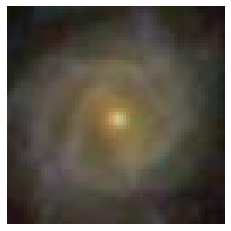

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


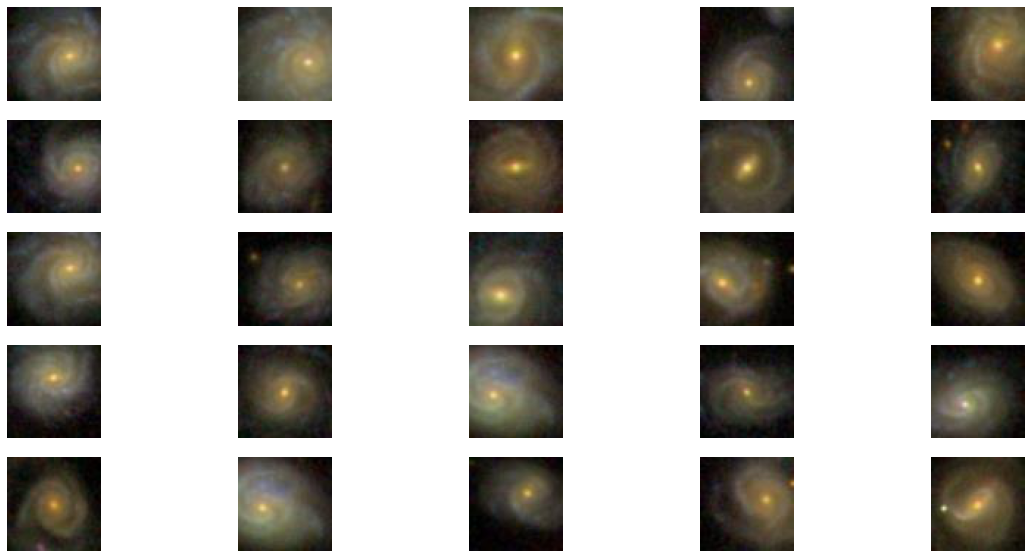

{'Agn': 40, 'Gal': 778, 'None': 107, 'Qso': 19, 'Star': 56}


In [30]:
dists, nnIds = run_image(1)

Query:


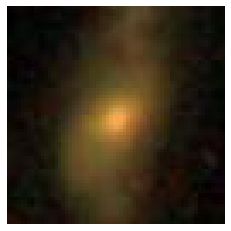

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


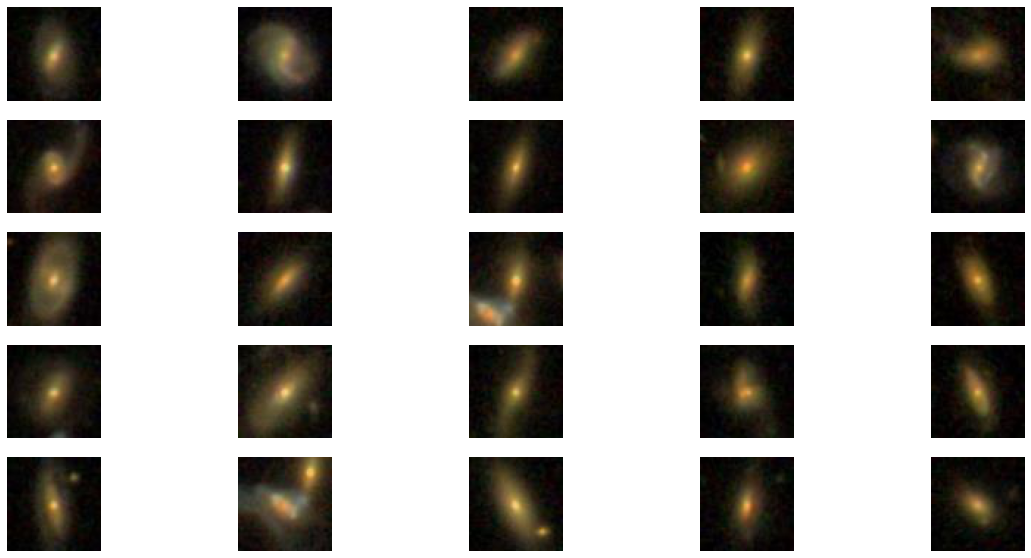

{'Agn': 34, 'Gal': 921, 'None': 29, 'Qso': 5, 'Star': 11}


0

In [31]:
dists, nnIds = run_image(2)
num_below_threshold(dists, 3.25)

Query:


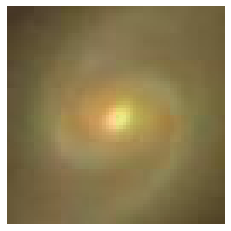

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


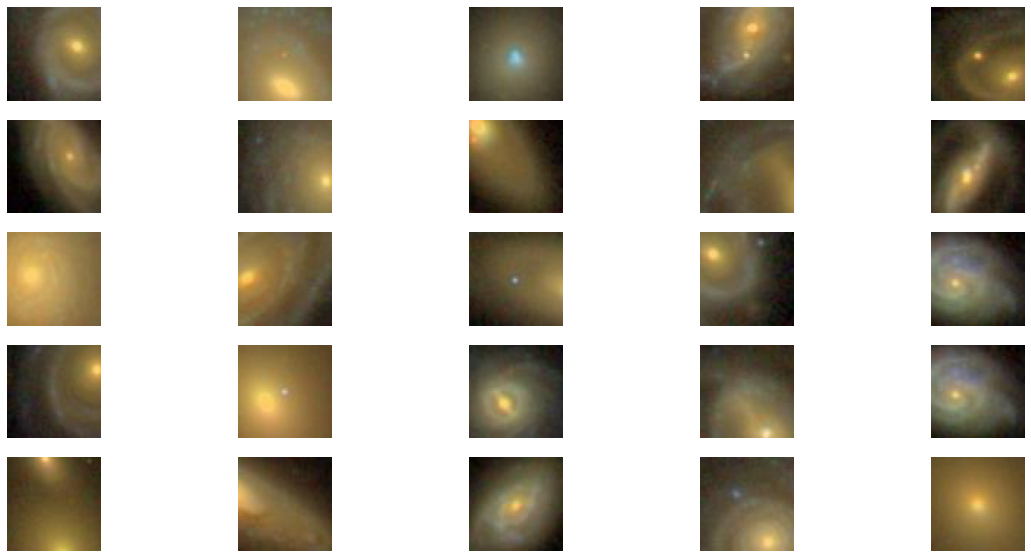

{'Agn': 26, 'Gal': 723, 'None': 149, 'Qso': 11, 'Star': 90, 'highZQso': 1}


In [32]:
dists, nnIds = run_image(3)

Query:


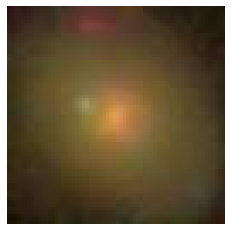

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


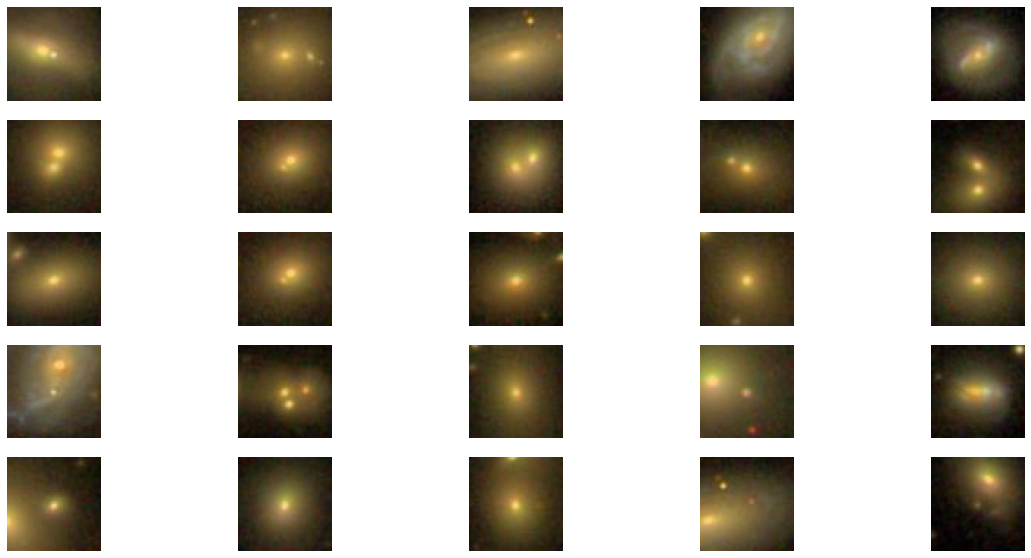

{'Agn': 23, 'Gal': 847, 'None': 71, 'Qso': 5, 'Star': 54}


In [33]:
dists, nnIds = run_image(4)

Query:


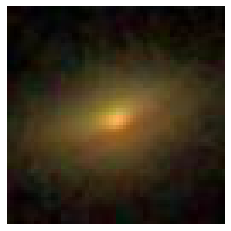

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


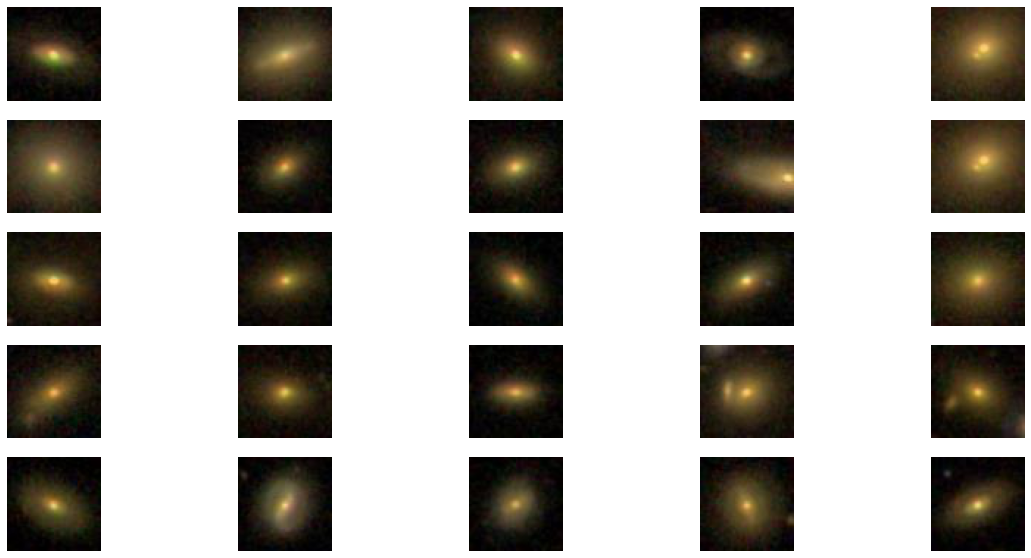

{'Agn': 28, 'Gal': 941, 'None': 19, 'Qso': 2, 'Star': 10}


In [34]:
dists, nnIds = run_image(5)

Query:


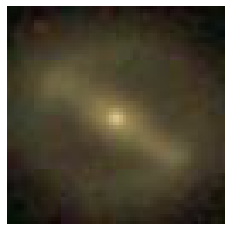

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


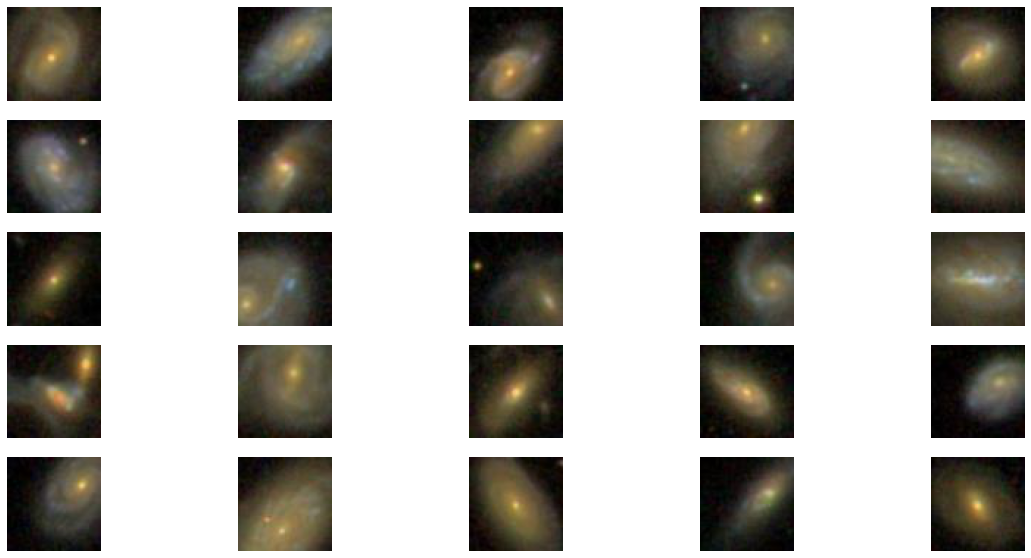

{'Agn': 30, 'Gal': 834, 'None': 89, 'Qso': 11, 'Star': 36}


In [35]:
dists, nnIds = run_image(6)

Query:


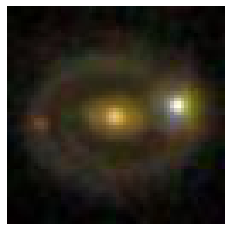

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


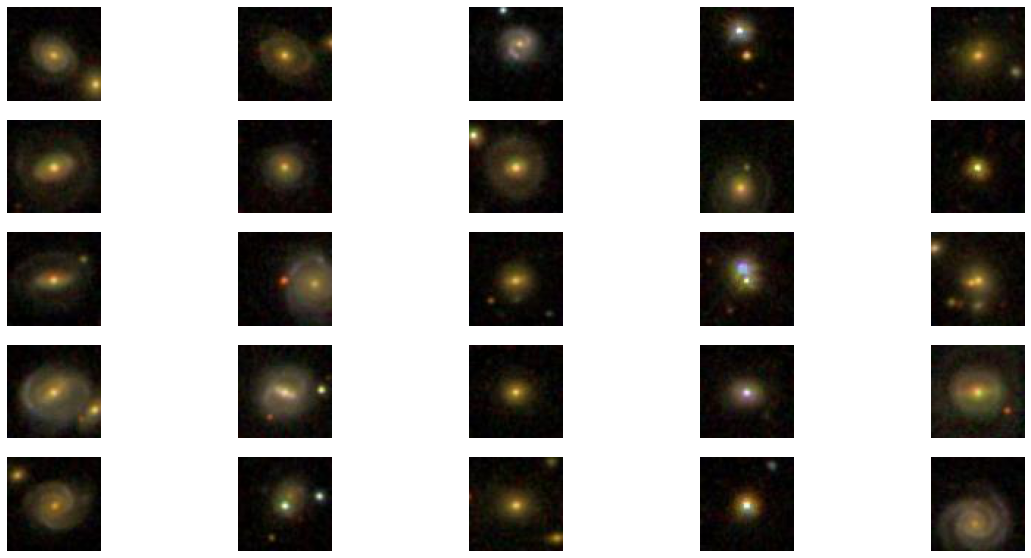

{'Agn': 18, 'Gal': 423, 'None': 231, 'Qso': 25, 'Star': 303}


In [36]:
dists, nnIds = run_image(7)

Query:


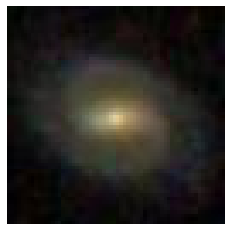

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


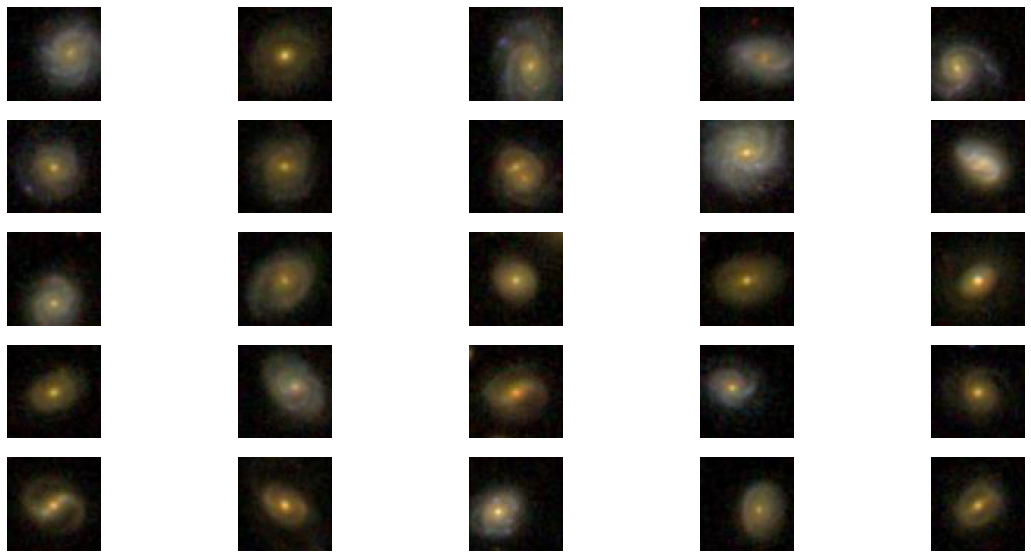

{'Agn': 49, 'Gal': 782, 'None': 88, 'Qso': 15, 'Star': 66}


In [37]:
dists, nnIds = run_image(8)

Query:


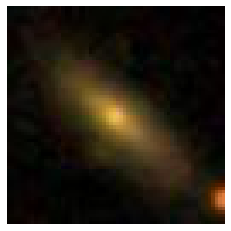

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


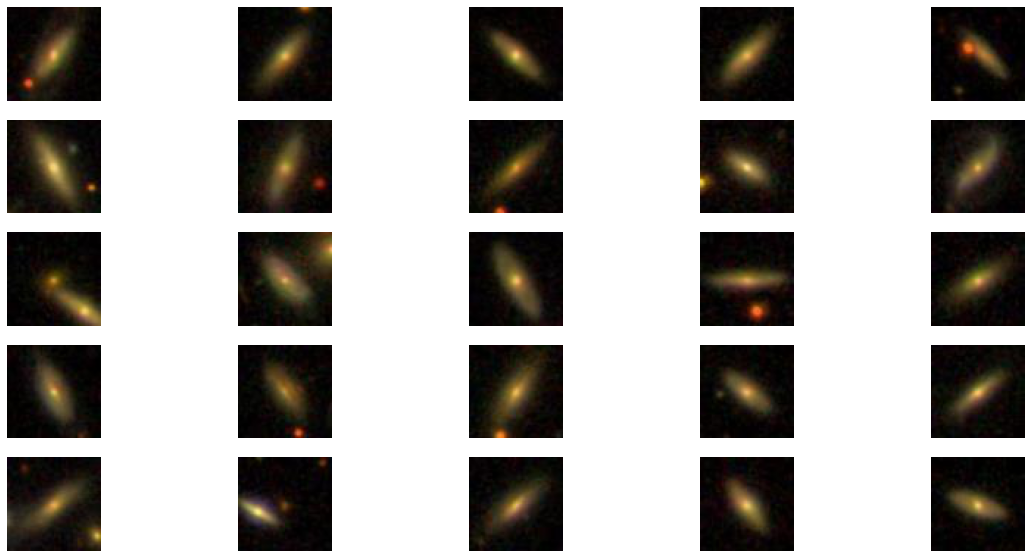

{'Agn': 50, 'Gal': 865, 'None': 36, 'Qso': 4, 'Star': 45}


In [38]:
dists, nnIds = run_image(9)

Query:


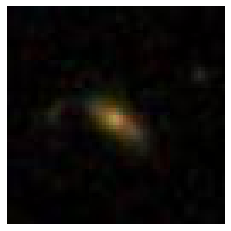

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


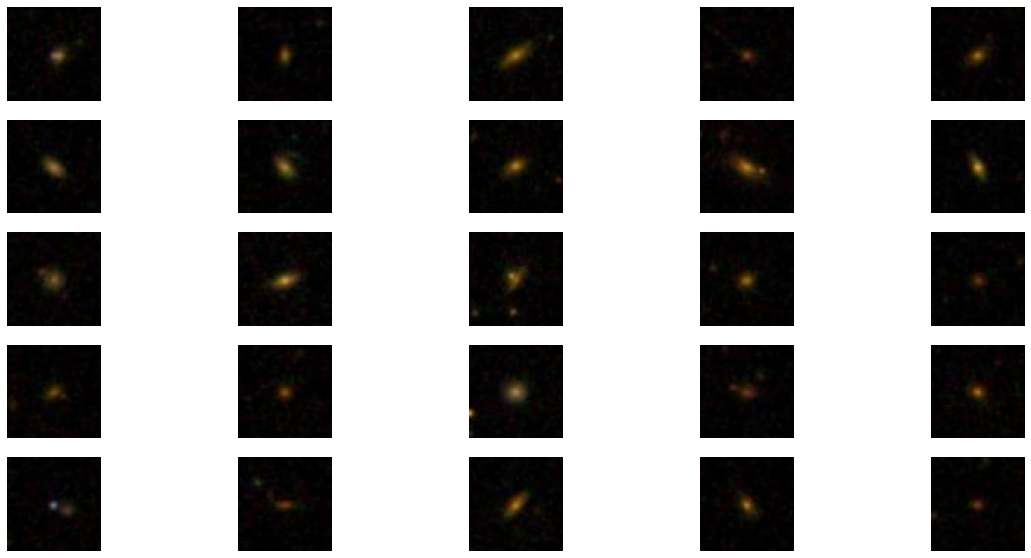

{'Agn': 25, 'Gal': 805, 'None': 115, 'Qso': 36, 'Star': 17, 'highZQso': 1}


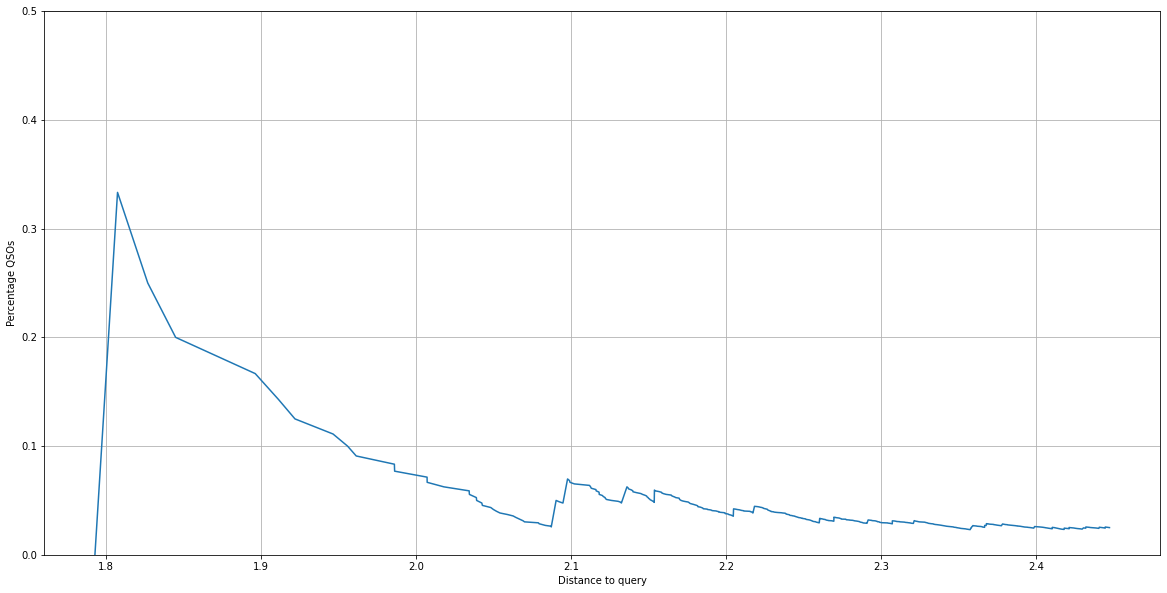

In [39]:
dists, nnIds = run_image(0, 'Agn')

Query:


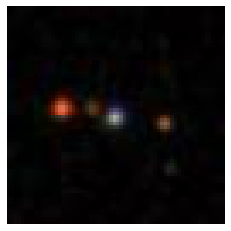

Loaded pretrained weights for efficientnet-b0
Nearest neighbours:


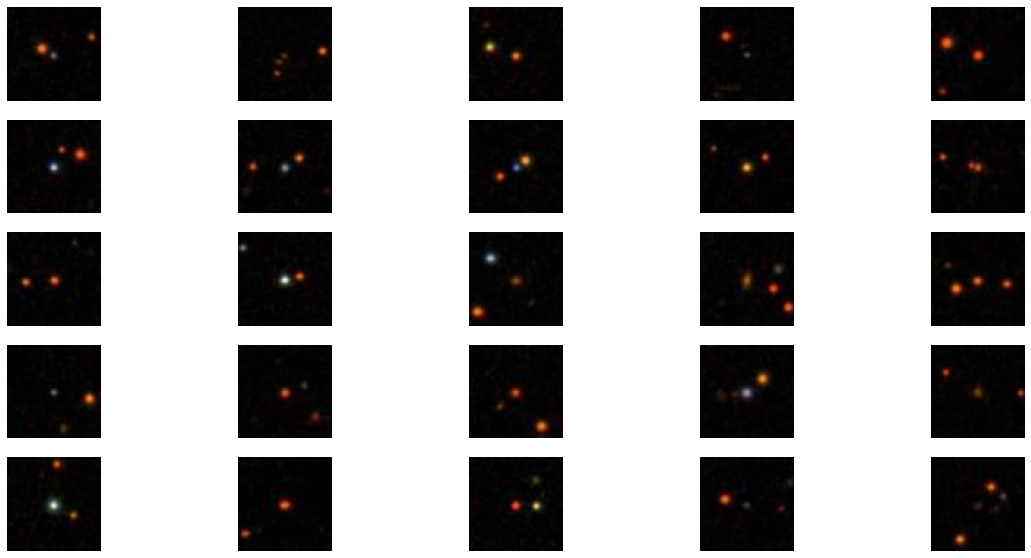

{'Agn': 1, 'Gal': 176, 'None': 126, 'Qso': 180, 'Star': 510, 'highZQso': 6}


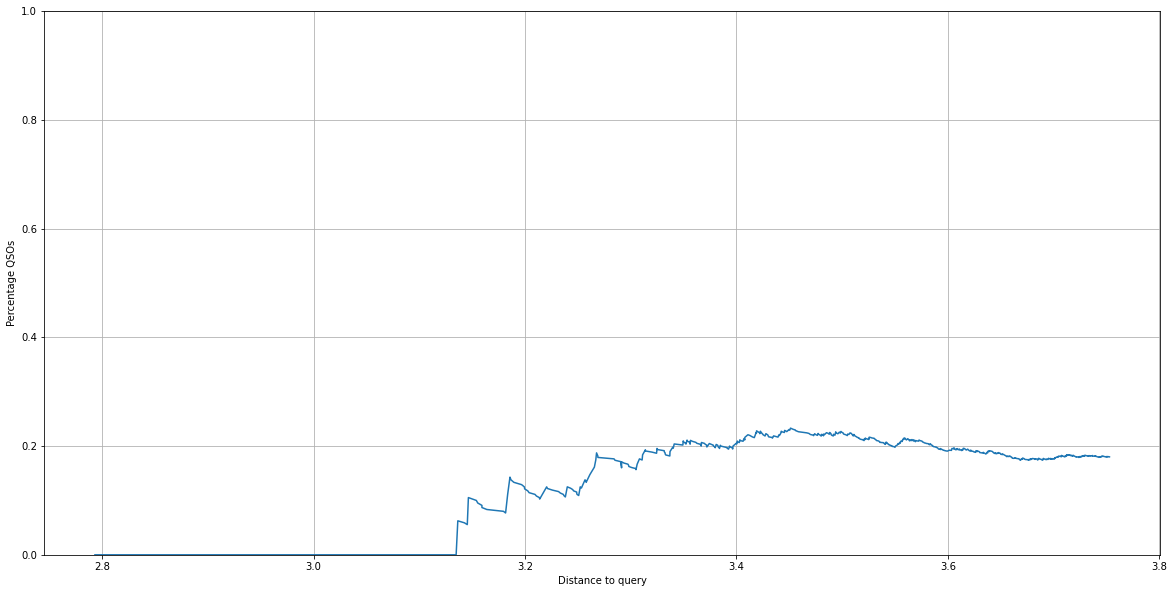

In [40]:
dists, nnIds = run_image(0, 'Qso')